In [3]:
from matplotlib import pyplot as plt 
from PIL import Image
import numpy as np

# Linear filter
Filter is nothing but a kernel use to enhance the image quality by sharpening its edges or the noise cancellations etc.

convolution : we just take the dot product of the kernel and equally sized portion of the image. after that we shift the kernel and repeat the process.

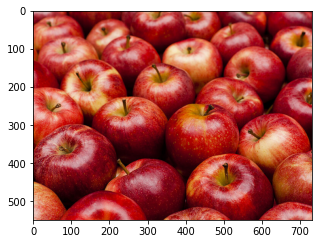

In [4]:
image = Image.open('apple.jpg')
plt.figure(figsize=(5,5))
plt.imshow(image)
plt.show()

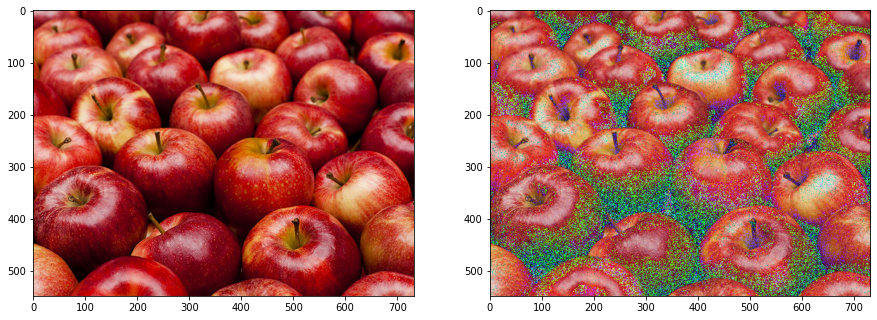

In [5]:
rows = image.size[1]
columns= image.size[0]

# Creates values using a normal distribution with a mean of 0 and standard deviation of 15, the values are converted to unit8 which means the values are between 0 and 255
noise = np.random.normal(0,15,(rows,columns,3)).astype(np.uint8)
#adding the noise to the image
image_noisy = image + noise
# creating a PIL image from an array
image_noisy = Image.fromarray(image_noisy)

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(image_noisy)
plt.show()



When adding noise to an image sometimes the value might be greater than 255, in this case 256, is subtracted from the value to wrap the number around keeping it between 0 and 255. For example, consider an image with an RGB value of 137 and we add noise with an RGB value of 215 to get an RGB value of 352. We then subtract 256, the total number of possible values between 0 and 255, to get a number between 0 and 255.


<b> Filtering Noise </b>

In [6]:
from PIL import ImageFilter

 smoothing filter: average out the pixels in its neighbourhood

In [7]:
# a kernel of 5*5 which contains all its element 1/36 
kernel = np.ones((5,5))/36

# Creating a ImageFilter Kernel by providing the kernel size and a flattened kernel
kernel_filter = ImageFilter.Kernel((5,5), kernel.flatten())


And the filter performs the convolution bw the image and each of the color channel independently

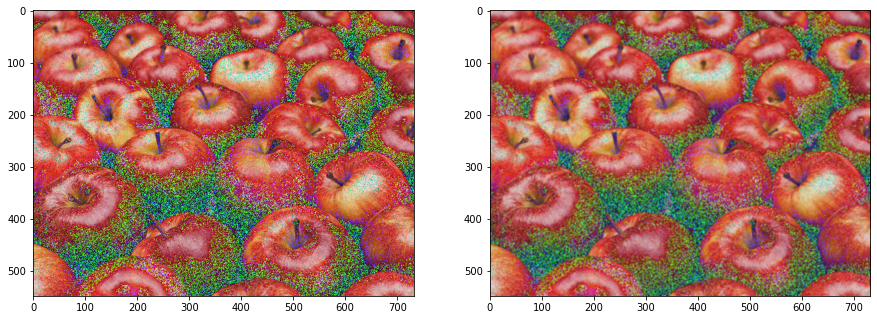

In [17]:
image_filtered = image_noisy.filter(kernel_filter)

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(image_noisy)

plt.subplot(1,2,2)
plt.imshow(image_filtered)
plt.show()

smaller kernel keeps the image sharp, here we can use the 3*3 filter

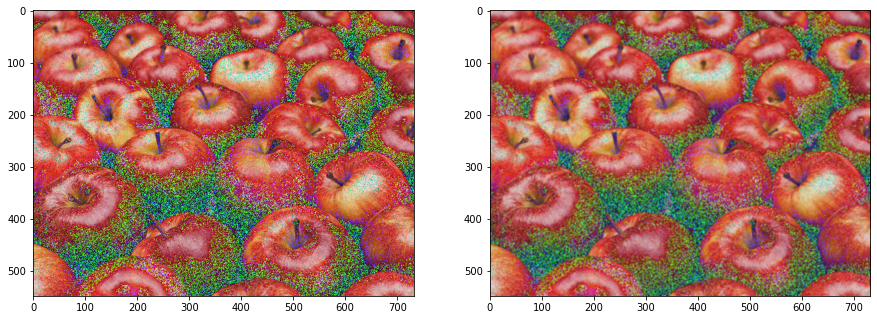

In [18]:
kernel = np.ones((3,3))/36
kernel_filter = ImageFilter.Kernel((3,3), kernel.flatten())

image_filtered = image_noisy.filter(kernel_filter)

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(image_noisy)

plt.subplot(1,2,2)
plt.imshow(image_filtered)
plt.show()

<B> Gussian Blur </B>

 

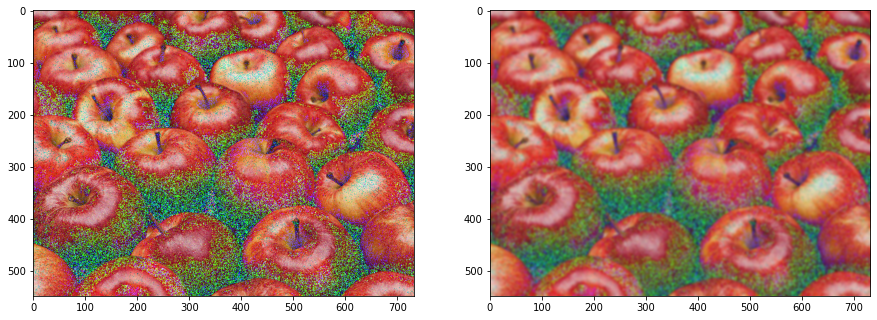

In [19]:
image_blur = image_noisy.filter(ImageFilter.GaussianBlur)

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(image_noisy)

plt.subplot(1,2,2)
plt.imshow(image_blur)
plt.show()

<b>Image Sharpening</b>
 
for sharpening the image we can use the following kernel

$ [[-1,-1,-1], 
   [-1, 9,-1],
   [-1,-1,-1]] $


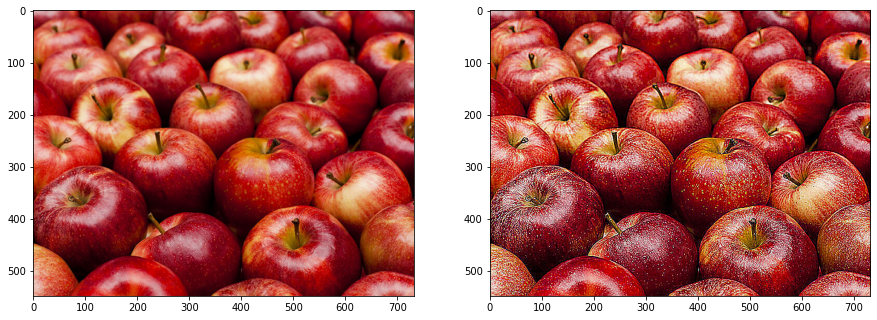

In [11]:
image = Image.open("apple.jpg")
kernel = np.array([[-1,-1,-1], 
                   [-1, 9,-1],
                   [-1,-1,-1]])
kernel= ImageFilter.Kernel((3,3),kernel.flatten())

sharp_image= image.filter(kernel)

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(image)

plt.subplot(1,2,2)
plt.imshow(sharp_image)
plt.show()

<b>predefined filter</b>

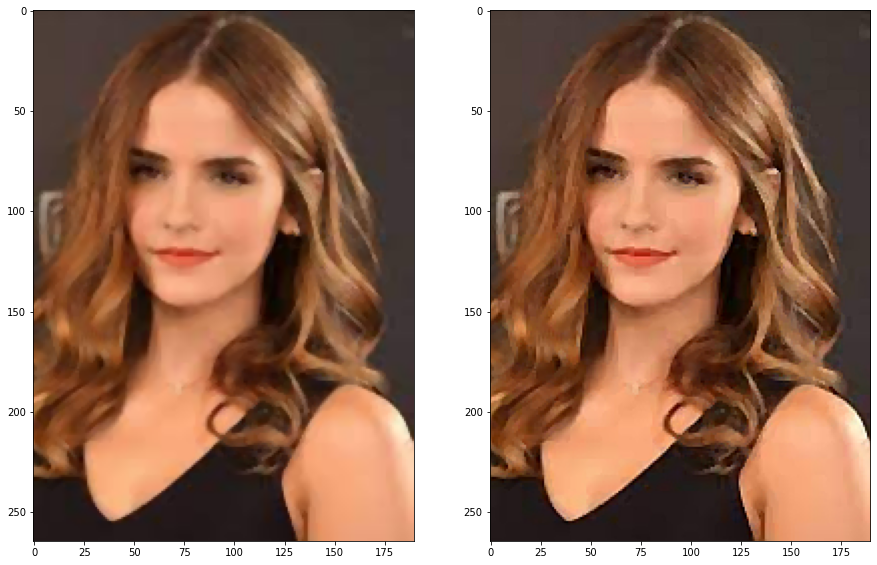

In [20]:
sharp_image = image.filter(ImageFilter.SHARPEN)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(image)

plt.subplot(1,2,2)
plt.imshow(sharp_image)
plt.show()

# Edges

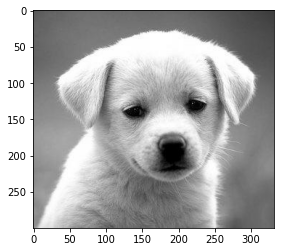

In [13]:
gray_img = Image.open('dog.jpg')
plt.imshow(gray_img, cmap= 'gray')
plt.show()

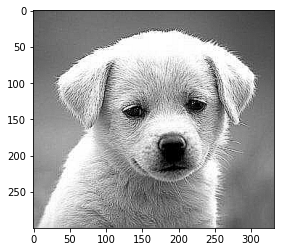

In [14]:
gray_img = gray_img.filter(ImageFilter.EDGE_ENHANCE)

plt.imshow(gray_img , cmap='gray')

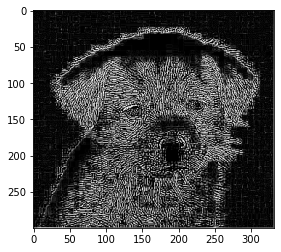

In [15]:
gray_img = gray_img.filter(ImageFilter.FIND_EDGES)

plt.imshow(gray_img , cmap='gray')

# Median Filter
this filter replaces the center value under the kernel by finding the average of the all the pixels under it.

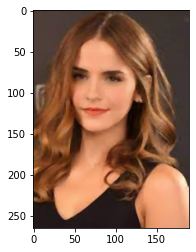

In [16]:
image = Image.open("emma.jpg")

image = image.filter(ImageFilter.MedianFilter)

plt.imshow(image , cmap='gray')